In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import re
from sklearn.svm import SVC
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [3]:
mat=loadmat("data_pulso2.mat")
X=mat["Xtrain"]
y=mat["ytrain"]


Xtest=mat["Xtest"]
ytest=mat["ytest"]

m = len(y)
mtest = len(ytest)
print(m)
print(mtest)

print(y.shape)
print(X.shape)
print(ytest.shape)
print(Xtest.shape)

1368
345
(1368, 1)
(1368, 15)
(345, 1)
(345, 15)


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
Xtest = scaler.fit_transform(Xtest)


# RBF

In [5]:
def dataset3Params_rbf(X, y, Xval, yval,vals):
    """
    Returns your choice of C and sigma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(kernel="rbf",C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

In [6]:
vals = [0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]
best_C, best_gamma = dataset3Params_rbf(X, y.ravel(), Xtest, ytest.ravel(),vals)

print('Best C:', best_C)
print('Best gamma:', best_gamma)
print('Best sigma:', 1/best_gamma)

classifier4 = SVC(C=best_C,gamma=best_gamma)
classifier4.fit(X,y.ravel())
prediction4 = classifier4.predict(Xtest)

print(classifier4.score(X,y))
print(classifier4.score(Xtest,ytest))

Best C: 1.09
Best gamma: 10.0
Best sigma: 0.1
0.9919590643274854
0.736231884057971


[[230   9]
 [ 82  24]]
[[937   1]
 [ 10 420]]


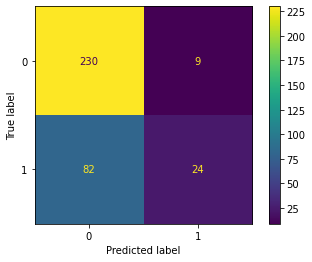

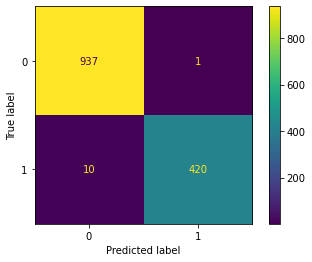

In [7]:
disp1=plot_confusion_matrix(classifier4,Xtest,ytest)
print(disp1.confusion_matrix)

disp2=plot_confusion_matrix(classifier4,X,y)
print(disp2.confusion_matrix)

Text(0.5, 0, 'Permutation Importance')

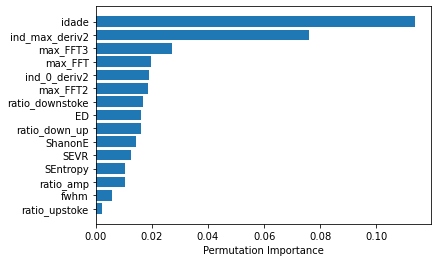

In [7]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(classifier4, Xtest, ytest)
feature_names = ['ratio_down_up', 'ratio_amp', 'ratio_downstoke', 'SEVR','ED', 'ind_max_deriv2','ind_0_deriv2', 'ratio_upstoke','SEntropy','ShanonE','max_FFT','max_FFT2','max_FFT3','fwhm','idade']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [8]:
from sklearn.metrics import f1_score
#F1 score
print(f1_score(ytest,prediction4)) 

0.34532374100719426


In [9]:
from sklearn.metrics import average_precision_score

#Recall
y_score1 = classifier4.decision_function(Xtest)
average_precision1 = average_precision_score(ytest, y_score1)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision1))

Average precision-recall score: 0.56


# LINEAR

In [10]:
def dataset3Params_linear(X, y, Xval, yval,vals):
    """
    Returns your choice of C and sigma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    acc = 0
    best_C=0
    for i in vals:
        C= i
        classifier = SVC(kernel="linear",C=C)
        classifier.fit(X,y)
        prediction = classifier.predict(Xval)
        score = classifier.score(Xval,yval)
        if score>acc:
            acc =score
            best_C =C                
    return best_C

In [11]:
vals = [0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]
best_C= dataset3Params_linear(X, y.ravel(), Xtest, ytest.ravel(),vals)

print('Best C:', best_C)

classifier5= SVC(C=best_C)
classifier5.fit(X,y.ravel())
prediction5 = classifier5.predict(Xtest)

print(classifier5.score(X,y))
print(classifier5.score(Xtest,ytest))

Best C: 9.802
0.9758771929824561
0.6550724637681159


[[230   9]
 [ 82  24]]
[[937   1]
 [ 10 420]]


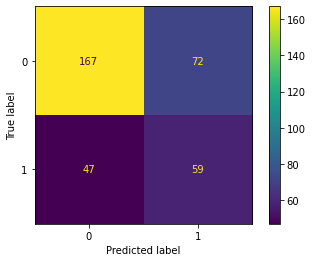

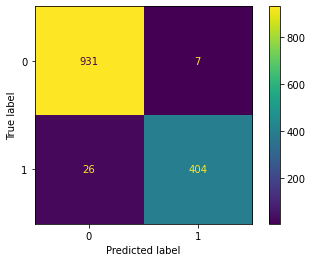

In [12]:
disp3=plot_confusion_matrix(classifier5,Xtest,ytest)
print(disp1.confusion_matrix)

disp4=plot_confusion_matrix(classifier5,X,y)
print(disp2.confusion_matrix)

Text(0.5, 0, 'Permutation Importance')

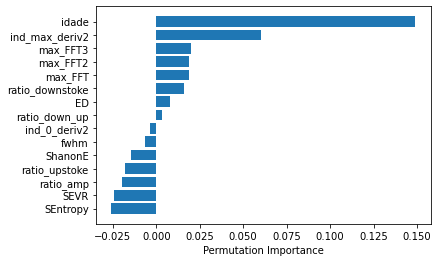

In [13]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(classifier5, Xtest, ytest)
feature_names = ['ratio_down_up', 'ratio_amp', 'ratio_downstoke', 'SEVR','ED', 'ind_max_deriv2','ind_0_deriv2', 'ratio_upstoke','SEntropy','ShanonE','max_FFT','max_FFT2','max_FFT3','fwhm','idade']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [14]:
#F1 score
print(f1_score(ytest,prediction5)) 

0.4978902953586497


In [15]:
#Recall
y_score2 = classifier5.decision_function(Xtest)
average_precision1 = average_precision_score(ytest, y_score2)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision1))

Average precision-recall score: 0.46


# RBF- outro algoritmo

In [16]:
param_grid2=[{'kernel': ['rbf'], 'gamma':  np.arange(0.1,10,0.198),
                     'C': np.arange(0.1,10,0.198)}]
#50 pontos
adv_svr_fine2 = GridSearchCV(SVC(),param_grid2)

In [17]:
adv_svr_fine2.fit(X,y.ravel())

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]),
                          'gamma': array([0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]),
                          'kernel': ['rbf']}])

In [ ]:
#pd.DataFrame(adv_svr_fine2.cv_results_)

In [18]:
best_par2 = adv_svr_fine2.best_estimator_.get_params()
print(best_par2['C'])
print(best_par2['gamma'])

0.1
0.4960000000000001


In [32]:
classifier2 = SVC(kernel="rbf",C=0.1, gamma=5.4)
classifier2.fit(X,y.ravel())
prediction2 = classifier2.predict(Xtest)

# Accuracy
print(classifier2.score(X,y)) 
print(classifier2.score(Xtest,ytest))

#F1 score
print(f1_score(ytest,prediction2)) 

0.8837719298245614
0.7101449275362319
0.16666666666666669


# LINEAR - outro algoritmo

In [33]:
param_grid1=[{'kernel': ['linear'], 'C': np.arange(0.1,10,0.198)}]
#50 pontos
adv_svr_fine1 = GridSearchCV(SVC(),param_grid1)

In [34]:
adv_svr_fine1.fit(X,y.ravel())

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]),
                          'kernel': ['linear']}])

In [ ]:
#pd.DataFrame(adv_svr_fine1.cv_results_)

In [35]:
best_par1 = adv_svr_fine1.best_estimator_.get_params()
print(best_par1['C'])

0.1


In [36]:
from sklearn.metrics import f1_score
classifier1 = SVC(kernel="linear",C=0.1)
classifier1.fit(X,y.ravel())
prediction1 = classifier1.predict(Xtest)

# Accuracy
print(classifier1.score(X,y)) 
print(classifier1.score(Xtest,ytest))

#F1 score
print(f1_score(ytest,prediction1)) 

0.8647660818713451
0.6869565217391305
0.47058823529411764
